# Introduction

## Group #6

## Group Members

Matthew Houde mhoude1@bryant.edu

Michael Warren mwarren4@bryant.edu

Mitchell Leahy mleahy3@bryant.edu

## Group Member Photos

Matthew Houde
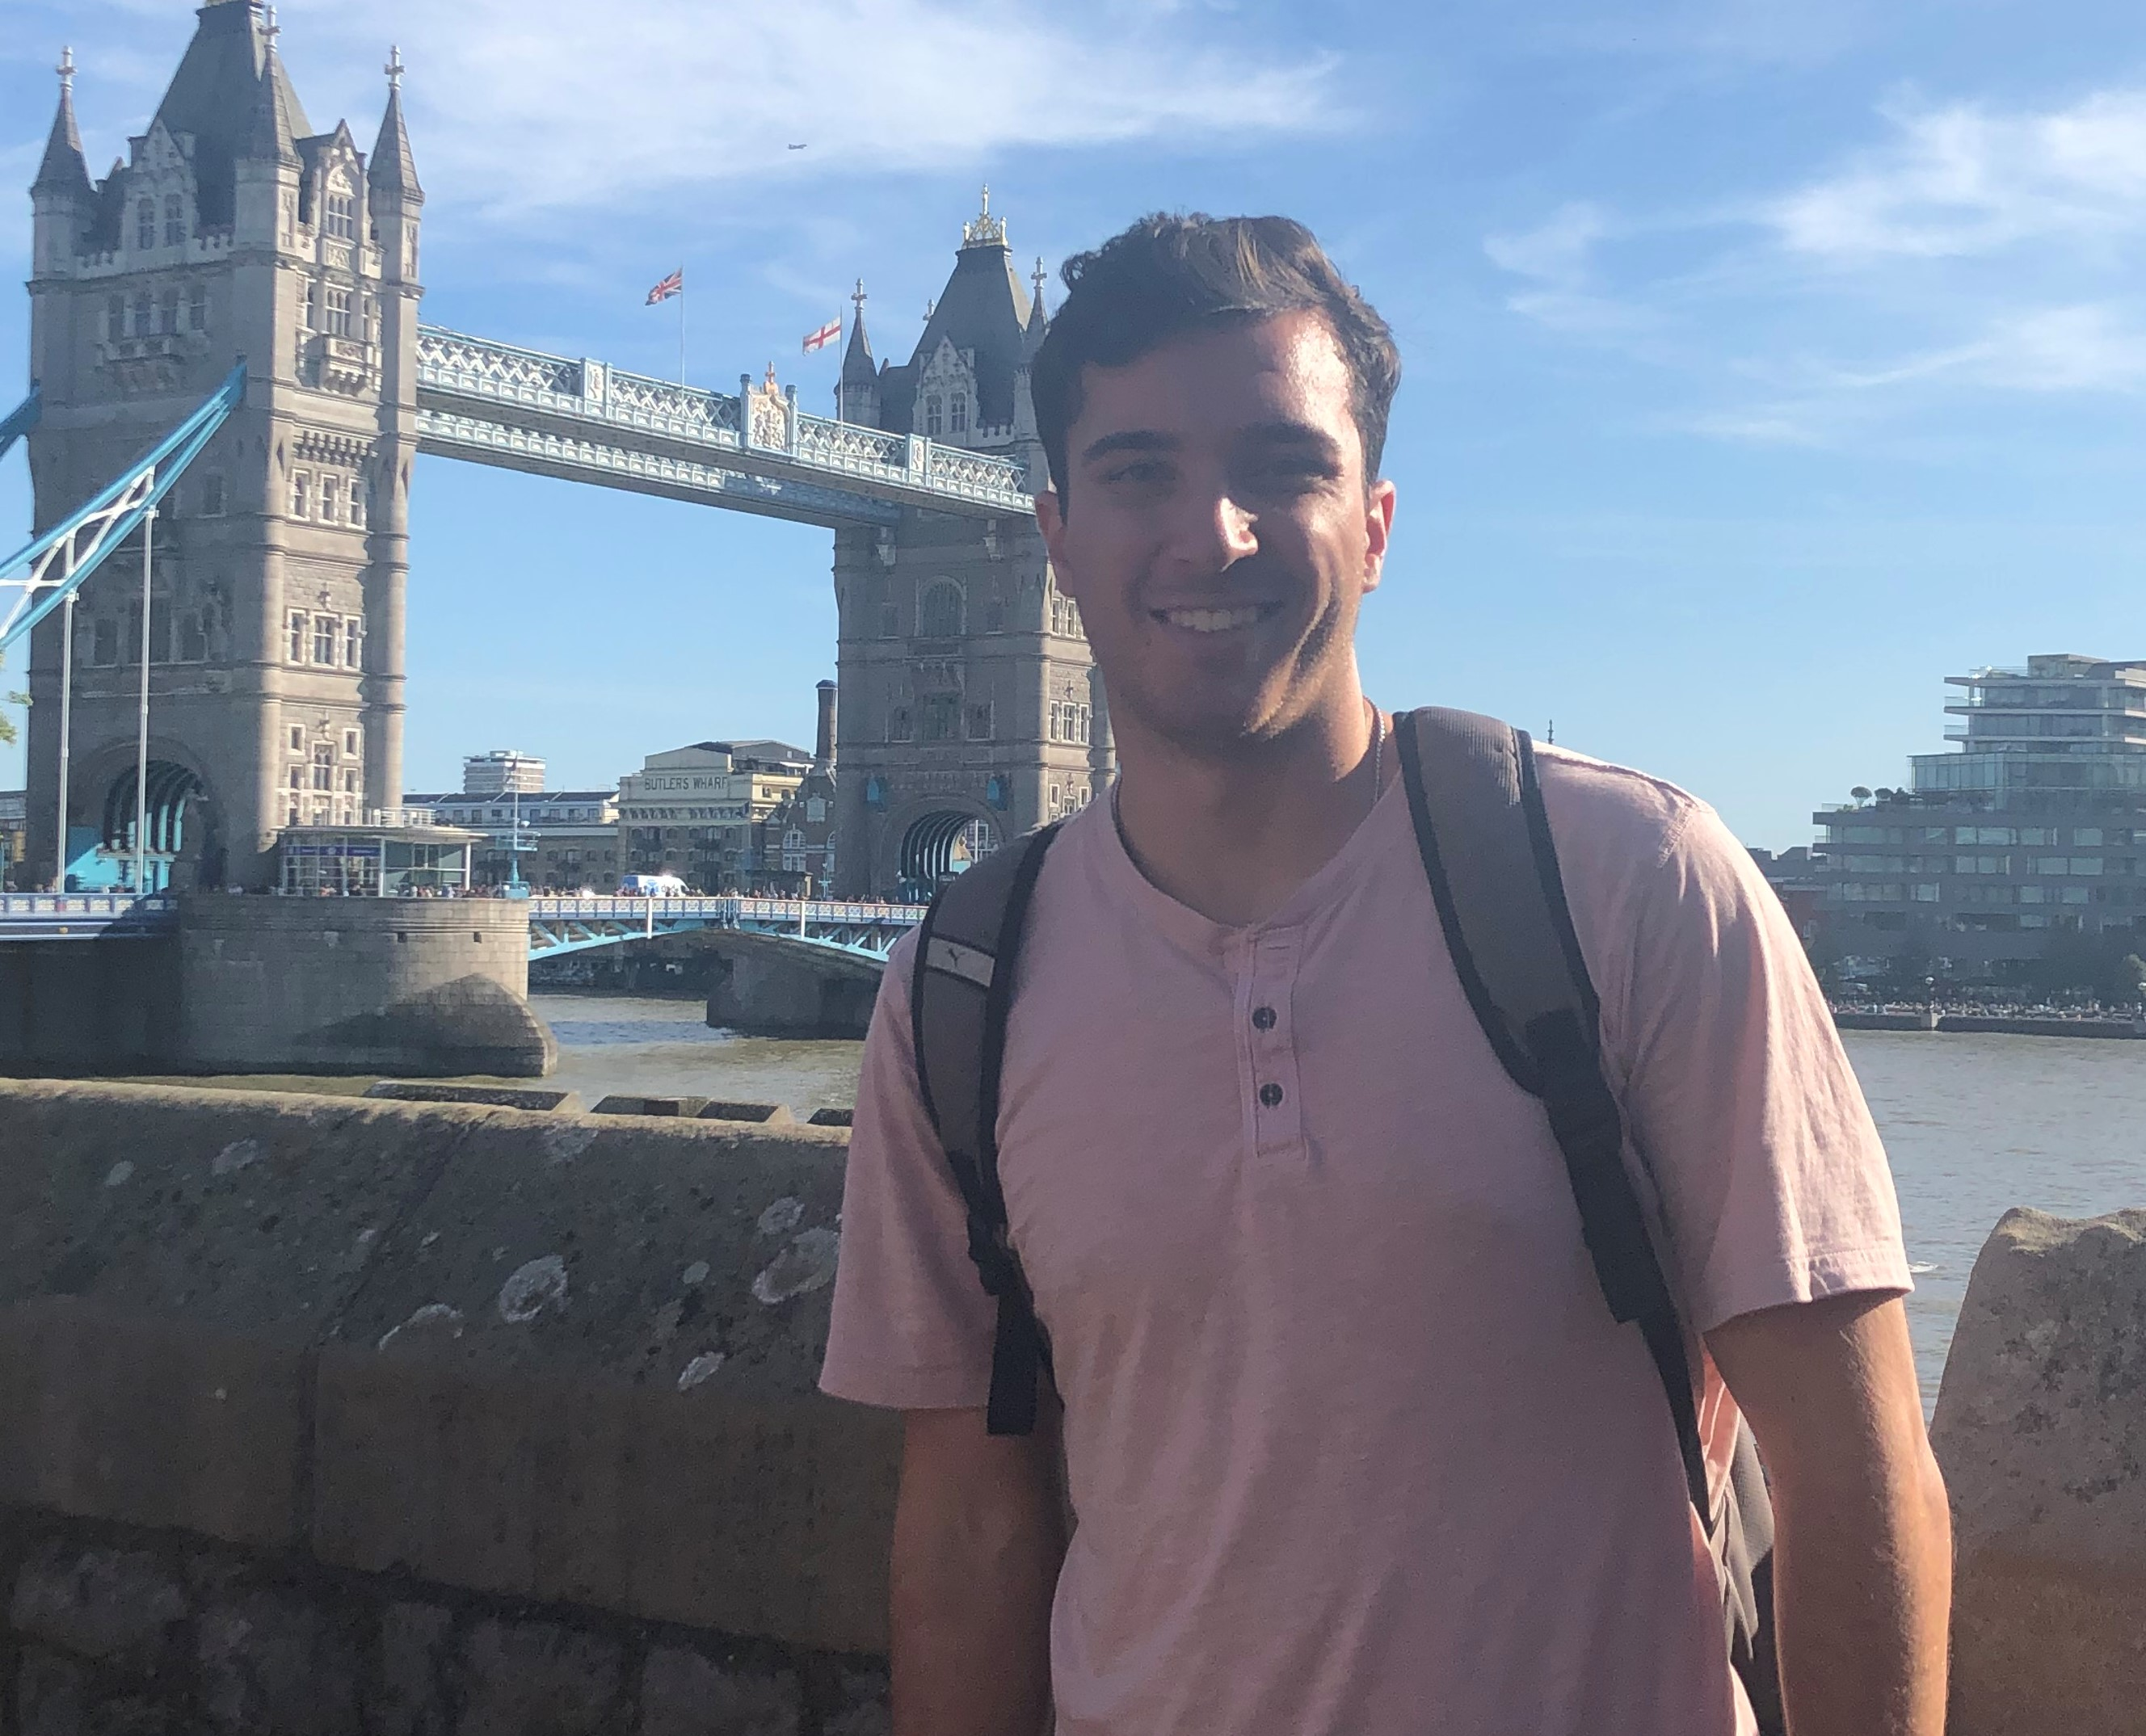

Michael Warren
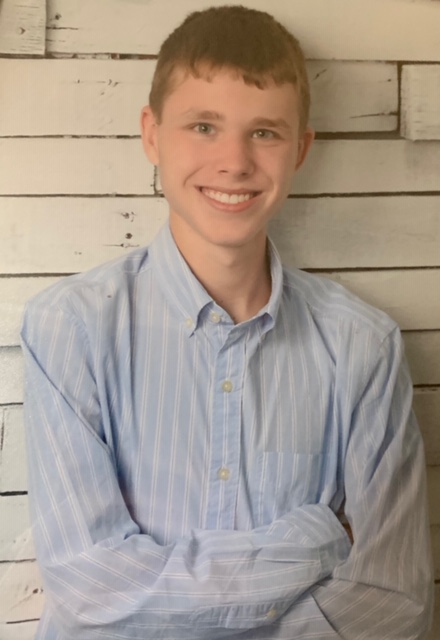

Mitchell Leahy
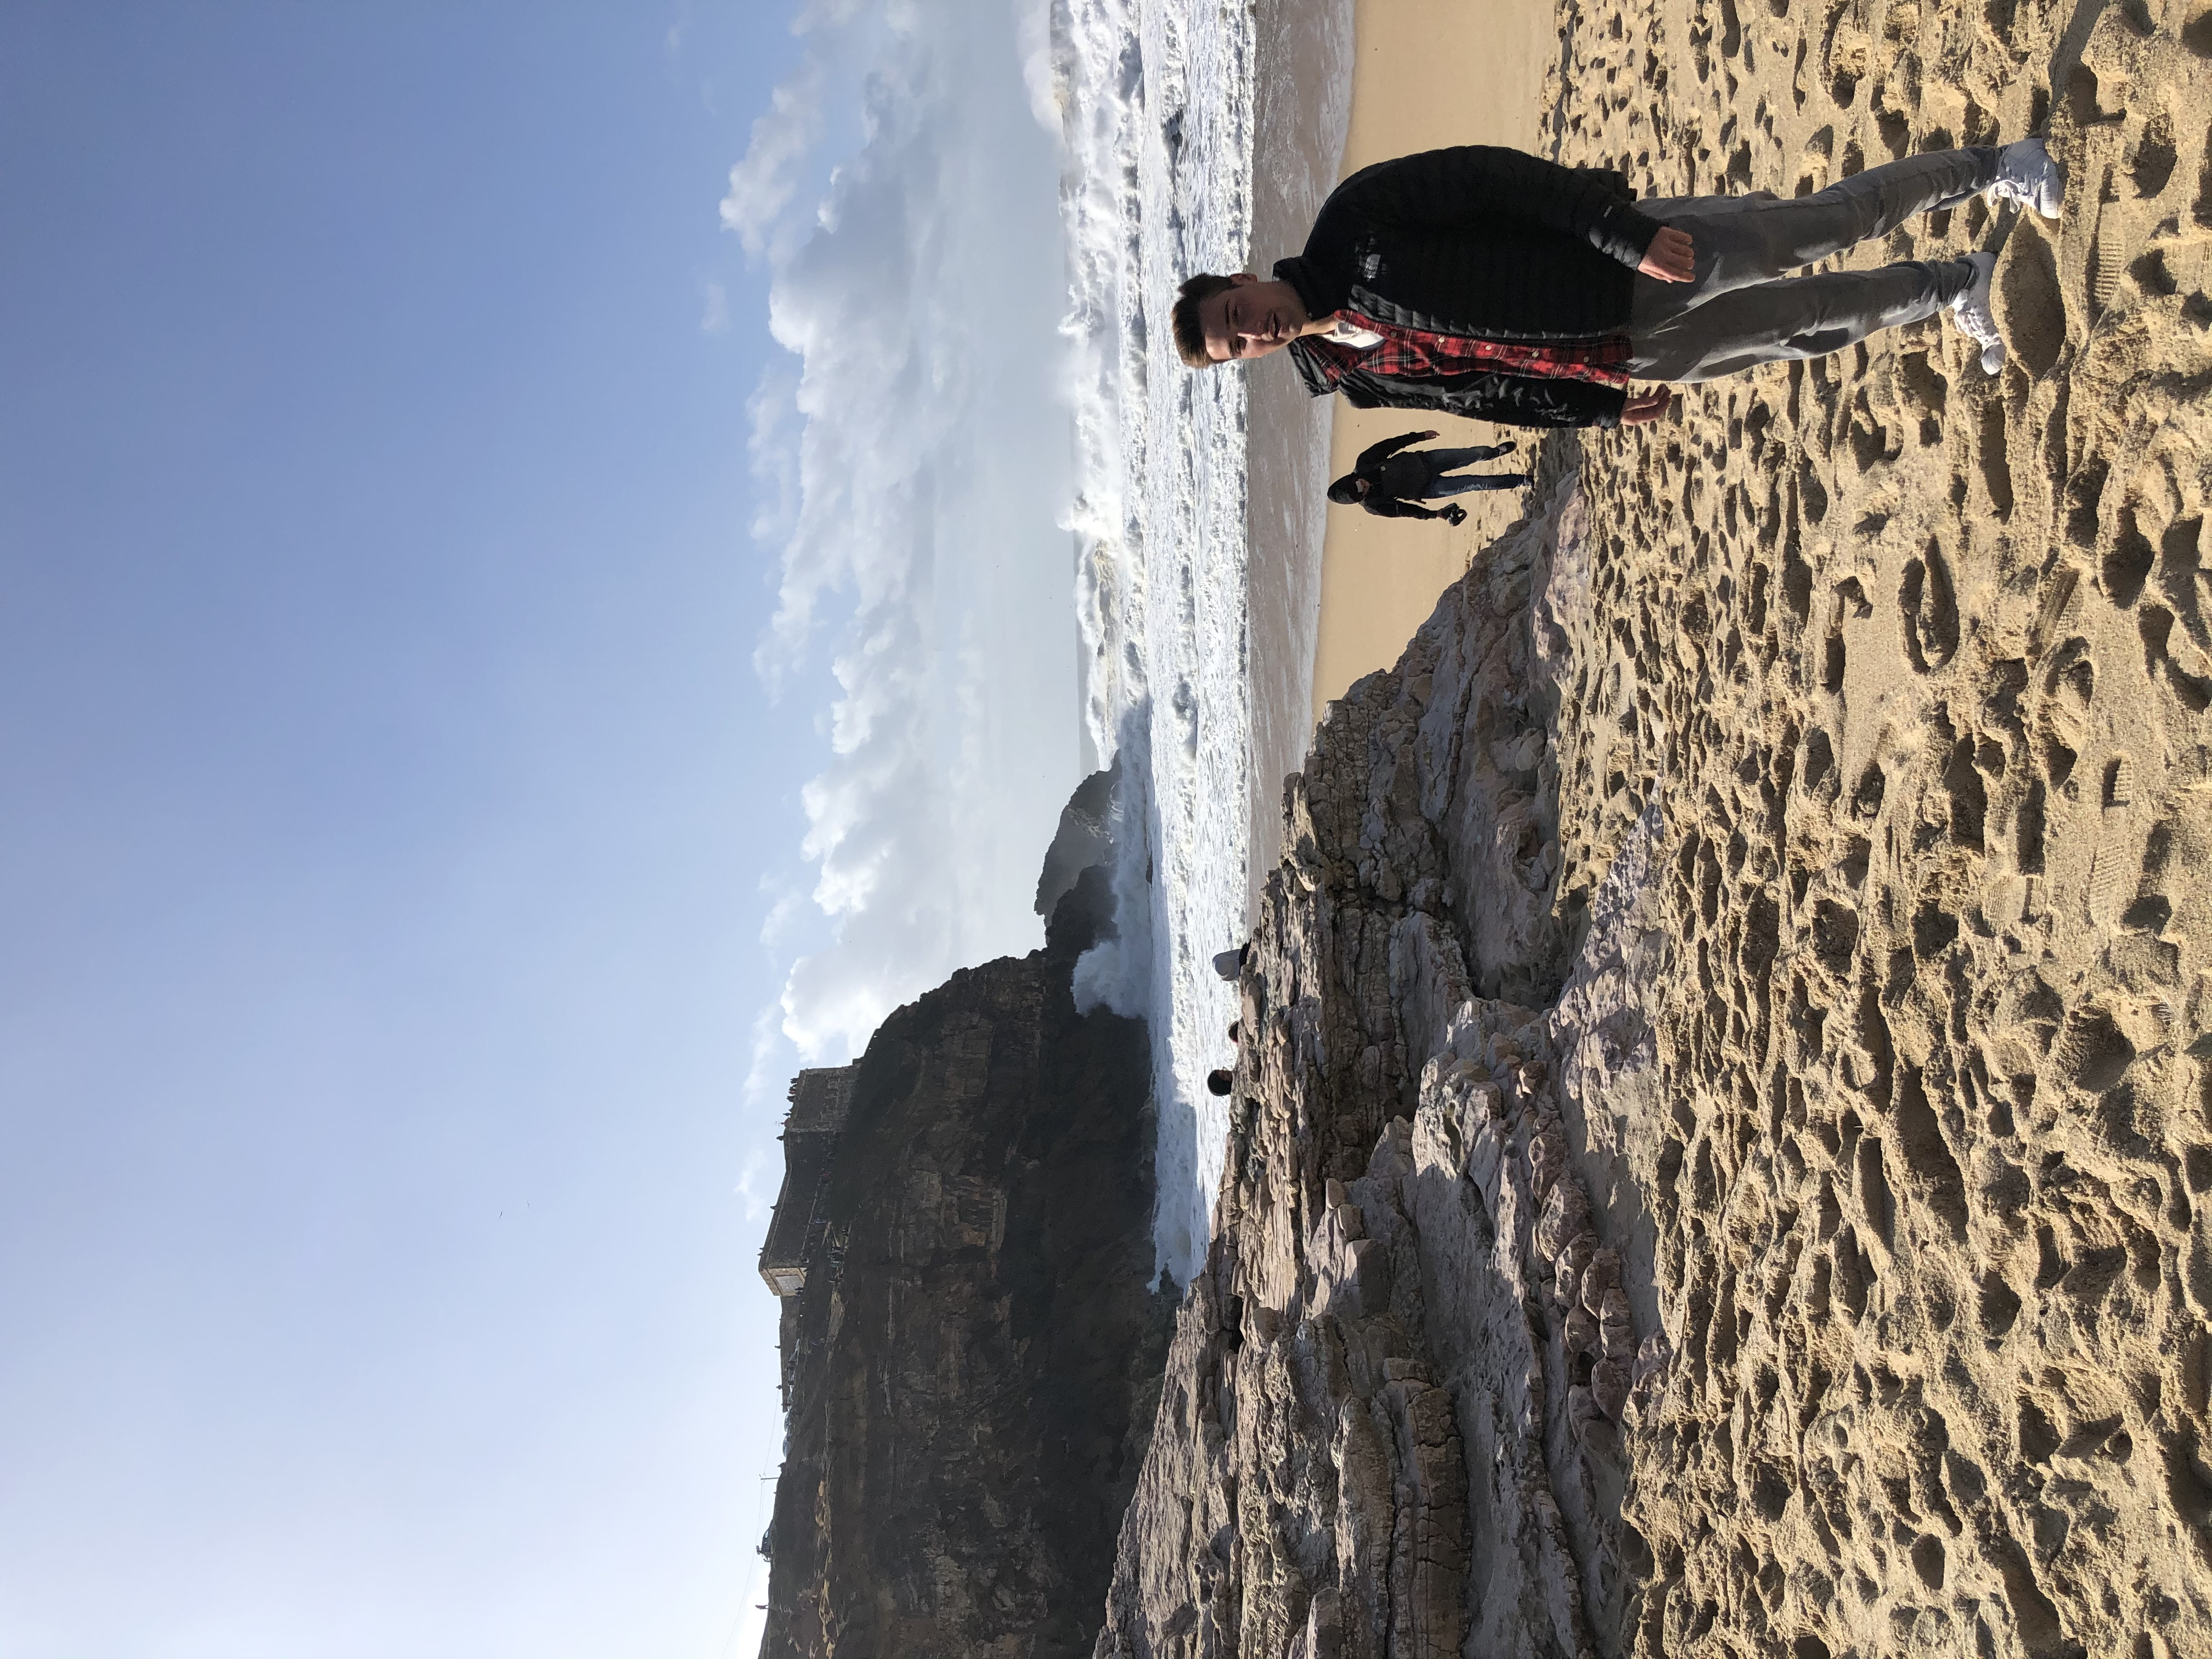

# Abstract

In this notebook we are creating a model that predicts the worldwide revenue of the 4398 movies in the dataset. Phase 2 of the project focuses on four types of features: log_num_feats = ["budget", "popularity"], date_feats = ['release_date'], cat_feats = ['belongs_to_collection', 'homepage', 'status'], and encode_feats = ['genres'].
The team had to do feature engineering on the columns in order to achieve an appropriate format for use in the modeling pipelines. We also conducted exploratory and visual data analysis. We then used object oriented programming to engineer some of the features and then set up a pipeline with the classes we created and some other imported libraries. The results that we got when submitting to Kaggle were 2.30107 for both the public and private scores for our best pipeline. This pipeline has a train a 2.2 and 2.11 for the RMSLE for the train and the test data respectively.


# Description

## Data Description

In this dataset, you are provided with 7398 movies and a variety of metadata obtained from The Movie Database (TMDB). Movies are labeled with id. Data points include cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries.

You are predicting the worldwide revenue for 4398 movies in the test file.

Note - many movies are remade over the years, therefore it may seem like multiple instance of a movie may appear in the data, however they are different and should be considered separate movies. In addition, some movies may share a title, but be entirely unrelated.

E.g. The Karate Kid (id: 5266) was released in 1986, while a clearly (or maybe just subjectively) inferior remake (id: 1987) was released in 2010. Also, while the Frozen (id: 5295) released by Disney in 2013 may be the household name, don't forget about the less-popular Frozen (id: 139) released three years earlier about skiers who are stranded on a chairlift...

## Task

Extensive EDA and visual EDA
Feature engineering + hyperparameter tuning in pipeline form
Work on the following features (NOTE: each section in your notebook from abstract to conclusions  will need to address the following new features):

log_num_feats = ["budget", "popularity"]
date_feats = ['release_date'] 
cat_feats = ['belongs_to_collection', 'homepage', 'status'] 
encode_feats = ['genres']

Make sure to submit your results on Kaggle and report your scores and rank in the competition's leaderboard
Your notebook should be organized and annotated using Markdown to describe the work you completed in Phase 2, explain your decision-making process, and provide analysis.
Each team will present a brief status update (2 minutes maximum). I will be strict on video duration; if you go over 2 minutes and I will give you ZERO (0) points).


## Diagrams

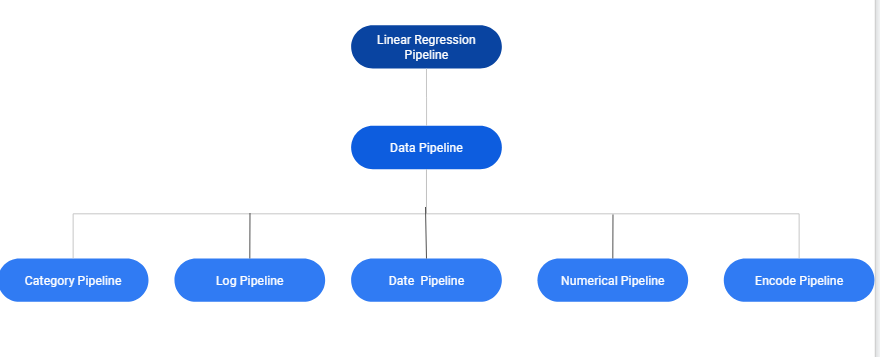

# Import Data

In [136]:
DATA_DIR = "./tmdb-box-office-prediction"   #same level as course repo in the data directory
#DATA_DIR = os.path.join('./ddddd/')
!mkdir $DATA_DIR


mkdir: cannot create directory ‘./tmdb-box-office-prediction’: File exists


In [137]:
!ls -l $DATA_DIR

total 0
-rwxr-xr-x 1 root root   139134 Apr 23 12:45 TestAdditionalFeatures.csv
-rwxr-xr-x 1 root root    94918 Apr 23 12:45 TrainAdditionalFeatures.csv
-rwxr-xr-x 1 root root    61585 Apr 23 12:45 sample_submission.csv
-rwxr-xr-x 1 root root 41868556 Apr 23 12:45 test.csv
-rwxr-xr-x 1 root root 28311747 Apr 23 12:45 train.csv


In [138]:
import pandas as pd
from collections import Counter
import os
import numpy as np
import math
def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = 'train'

df_train = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)
#datasets[ds_name] = trainOrig
ds_name = 'test'
df_test = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)
#datasets[ds_name] = testOrig



dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else eval(x) )
    return df
        
df_train = text_to_dict(df_train)
df_test = text_to_dict(df_test)



train: shape is (3000, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null o

id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
2   3                                                NaN   3300000   
3   4                                                NaN   1200000   
4   5                                                NaN         0   

                                              genres  \
0                     [{'id': 35, 'name': 'Comedy'}]   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2                      [{'id': 18, 'name': 'Drama'}]   
3  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
4  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

                            homepage    imdb_id original_language  \
0                                NaN  tt2637294                en   
1                                NaN  tt0368933                en   
2  http://sonyclassics.com/whiplash/  tt2582802                en   
3         http://kahaanithefilm.com/  tt1821480                hi   
4                                NaN  tt1380152                ko   

                             original_title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                      마린보이   

                                            overview  popularity  \
0  When Lou, who has become the "father of the In...    6.575393   
1  Mia Thermopolis is now a college graduate and ...    8.248895   
2  Under the direction of a ruthless instructor, ...   64.299990   
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936   
4  Marine Boy is the story of a former national s...    1.148070   

                        poster_path  \
0  /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg   
1  /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg   
2  /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg   
3  /aTXRaPrWSinhcmCrcfJK17urp3F.jpg   
4  /m22s7zvkVFDU9ir56PiiqIEWFdT.jpg   

                                production_companies  \
0  [{'name': 'Paramount Pictures', 'id': 4}, {'na...   
1        [{'name': 'Walt Disney Pictures', 'id': 2}]   
2  [{'name': 'Bold Films', 'id': 2266}, {'name': ...   
3                                                NaN   
4                                                NaN   

                                production_countries release_date  runtime  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...      2/20/15     93.0   
1  [{'iso_3166_1': 'US', 'name': 'United States o...       8/6/04    113.0   
2  [{'iso_3166_1': 'US', 'name': 'United States o...     10/10/14    105.0   
3            [{'iso_3166_1': 'IN', 'name': 'India'}]       3/9/12    122.0   
4      [{'iso_3166_1': 'KR', 'name': 'South Korea'}]       2/5/09    118.0   

                                    spoken_languages    status  \
0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
4           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]  Released   

                                             tagline  \
0  The Laws of Space and Time are About to be Vio...   
1  It can take a lifetime to find true love; she'...   
2    The road to greatness can take you to the edge.   
3                                                NaN   
4                                                NaN   

                                      title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                Marine Boy   

                                            Keywords  \
0  [{'id': 4379, 'name':

test: shape is (4398, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
id                       4398 non-null int64
belongs_to_collection    877 non-null object
budget                   4398 non-null int64
genres                   4382 non-null object
homepage                 1420 non-null object
imdb_id                  4398 non-null object
original_language        4398 non-null object
original_title           4398 non-null object
overview                 4384 non-null object
popularity               4398 non-null float64
poster_path              4397 non-null object
production_companies     4140 non-null object
production_countries     4296 non-null object
release_date             4397 non-null object
runtime                  4394 non-null float64
spoken_languages         4356 non-null object
status                   4396 non-null object
tagline                  3535 non-null object
title                    4395 non-null o

id                              belongs_to_collection   budget  \
0  3001  [{'id': 34055, 'name': 'Pokémon Collection', '...        0   
1  3002                                                NaN    88000   
2  3003                                                NaN        0   
3  3004                                                NaN  6800000   
4  3005                                                NaN  2000000   

                                              genres  \
0  [{'id': 12, 'name': 'Adventure'}, {'id': 16, '...   
1  [{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...   
2  [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   
3  [{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...   
4  [{'id': 36, 'name': 'History'}, {'id': 99, 'na...   

                                            homepage    imdb_id  \
0  http://www.pokemon.com/us/movies/movie-pokemon...  tt1226251   
1                                                NaN  tt0051380   
2                                                NaN  tt0118556   
3             http://www.sonyclassics.com/incendies/  tt1255953   
4                                                NaN  tt0418753   

  original_language               original_title  \
0                ja           ディアルガVSパルキアVSダークライ   
1                en  Attack of the 50 Foot Woman   
2                en             Addicted to Love   
3                fr                    Incendies   
4                en           Inside Deep Throat   

                                            overview  popularity  \
0  Ash and friends (this time accompanied by newc...    3.851534   
1  When an abused wife grows to giant size becaus...    3.559789   
2  Good-natured astronomer Sam is devastated when...    8.085194   
3  A mother's last wishes send twins Jeanne and S...    8.596012   
4  In 1972, a seemingly typical shoestring budget...    3.217680   

                        poster_path  \
0  /tnftmLMemPLduW6MRyZE0ZUD19z.jpg   
1  /9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg   
2  /ed6nD7h9sbojSWY2qrnDcSvDFko.jpg   
3  /sEUG3qjxwHjxkzuO7plrRHhOZUH.jpg   
4  /n4WC3zbelz6SG7rhkWbf8m9pMHB.jpg   

                                production_companies  \
0                                                NaN   
1  [{'name': 'Woolner Brothers Pictures Inc.', 'i...   
2  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   
3  [{'name': 'TS Productions', 'id': 313}, {'name...   
4                                                NaN   

                                production_countries release_date  runtime  \
0  [{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...      7/14/07     90.0   
1  [{'iso_3166_1': 'US', 'name': 'United States o...      5/19/58     65.0   
2  [{'iso_3166_1': 'US', 'name': 'United States o...      5/23/97    100.0   
3  [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...       9/4/10    130.0   
4  [{'iso_3166_1': 'US', 'name': 'United States o...      2/11/05     92.0   

                                    spoken_languages    status  \
0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
1           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3  [{'iso_639_1': 'fr', 'name': 'Français'}, {'is...  Released   
4           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  \
0  Somewhere Between Time & Space... A Legend Is ...   
1  A titanic beauty spreads a macabre wave of hor...   
2          A Comedy About Lost Loves And Last Laughs   
3  The search began at the opening of their mothe...   
4  It was filmed in 6 days for 25 thousand dollar...   

                          title  \
0  Pokémon: The Rise of Darkrai   
1   Attack of the 50 Foot Woman   
2              Addicted to Love   
3                     Incendies   
4            Inside Deep Throat   

                                            Keywords  \
0  [{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...   
1  [{'id': 9748, '

# Data Cleaning

In [139]:
df_train['release_date'] = pd.to_datetime(df_train['release_date'])
df_test['release_date'] = pd.to_datetime(df_test['release_date'])

In [140]:
# fix release dates
df_train.iloc[df_train[df_train.release_date > '06/01/2019'].release_date.index,[13]] = \
df_train[df_train.release_date > '06/01/2019'].release_date.apply(lambda x: x - pd.DateOffset(years=100))

# data fixes from https://www.kaggle.com/somang1418/happy-valentines-day-and-keep-kaggling-3
df_train.loc[df_train['id'] == 16,'revenue'] = 192864          # Skinning
df_train.loc[df_train['id'] == 90,'budget'] = 30000000         # Sommersby          
df_train.loc[df_train['id'] == 118,'budget'] = 60000000        # Wild Hogs
df_train.loc[df_train['id'] == 149,'budget'] = 18000000        # Beethoven
df_train.loc[df_train['id'] == 313,'revenue'] = 12000000       # The Cookout 
df_train.loc[df_train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
df_train.loc[df_train['id'] == 464,'budget'] = 20000000        # Parenthood
df_train.loc[df_train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
df_train.loc[df_train['id'] == 513,'budget'] = 930000          # From Prada to Nada
df_train.loc[df_train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
df_train.loc[df_train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
df_train.loc[df_train['id'] == 850,'budget'] = 90000000        # Modern Times
df_train.loc[df_train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
df_train.loc[df_train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
df_train.loc[df_train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
df_train.loc[df_train['id'] == 1542,'budget'] = 1              # All at Once
df_train.loc[df_train['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
df_train.loc[df_train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
df_train.loc[df_train['id'] == 1714,'budget'] = 46000000       # The Recruit
df_train.loc[df_train['id'] == 1721,'budget'] = 17500000       # Cocoon
df_train.loc[df_train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
df_train.loc[df_train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
df_train.loc[df_train['id'] == 2491,'revenue'] = 6800000       # Never Talk to Strangers
df_train.loc[df_train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
df_train.loc[df_train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
df_train.loc[df_train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
df_train.loc[df_train['id'] == 2801,'budget'] = 10000000       # Fracture
df_test.loc[df_test['id'] == 3889,'budget'] = 15000000       # Colossal
df_test.loc[df_test['id'] == 6733,'budget'] = 5000000        # The Big Sick
df_test.loc[df_test['id'] == 3197,'budget'] = 8000000        # High-Rise
df_test.loc[df_test['id'] == 6683,'budget'] = 50000000       # The Pink Panther 2
df_test.loc[df_test['id'] == 5704,'budget'] = 4300000        # French Connection II
df_test.loc[df_test['id'] == 6109,'budget'] = 281756         # Dogtooth
df_test.loc[df_test['id'] == 7242,'budget'] = 10000000       # Addams Family Values
df_test.loc[df_test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
df_test.loc[df_test['id'] == 5591,'budget'] = 4000000        # The Orphanage
df_test.loc[df_test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee

power_six = df_train.id[df_train.budget > 1000][df_train.revenue < 100]

for k in power_six :
    df_train.loc[df_train['id'] == k,'revenue'] =  df_train.loc[df_train['id'] == k,'revenue'] * 1000000

In [141]:
ds_name = 'train'
print(f'dataset {ds_name:24}: [ {df_train.shape[0]:10,}, {df_train.shape[1]}]')
ds_name = 'test' 
print(f'dataset {ds_name:24}: [ {df_test.shape[0]:10,}, {df_test.shape[1]}]')

dataset train                   : [      3,000, 23]
dataset test                    : [      4,398, 22]


In [142]:
y_pred = np.linspace(0, 10, 11) #pred must be positive
print(y_pred)
np.log(y_pred+1)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791,
       1.79175947, 1.94591015, 2.07944154, 2.19722458, 2.30258509,
       2.39789527])

In [143]:
import numpy as np
y_actual = np.linspace(10, 0, 11) # must be positive
y_pred = 5#np.linspace(0, 10, 11) #pred must be positive
print(y_pred-y_actual)
np.sqrt(np.square((np.log(y_pred + 1) - np.log(y_actual + 1))))

[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


array([0.6061358 , 0.51082562, 0.40546511, 0.28768207, 0.15415068,
       0.        , 0.18232156, 0.40546511, 0.69314718, 1.09861229,
       1.79175947])

In [144]:
y_actual = np.linspace(400, 0, 401) # must be positive
200-y_actual

array([-200., -199., -198., -197., -196., -195., -194., -193., -192.,
       -191., -190., -189., -188., -187., -186., -185., -184., -183.,
       -182., -181., -180., -179., -178., -177., -176., -175., -174.,
       -173., -172., -171., -170., -169., -168., -167., -166., -165.,
       -164., -163., -162., -161., -160., -159., -158., -157., -156.,
       -155., -154., -153., -152., -151., -150., -149., -148., -147.,
       -146., -145., -144., -143., -142., -141., -140., -139., -138.,
       -137., -136., -135., -134., -133., -132., -131., -130., -129.,
       -128., -127., -126., -125., -124., -123., -122., -121., -120.,
       -119., -118., -117., -116., -115., -114., -113., -112., -111.,
       -110., -109., -108., -107., -106., -105., -104., -103., -102.,
       -101., -100.,  -99.,  -98.,  -97.,  -96.,  -95.,  -94.,  -93.,
        -92.,  -91.,  -90.,  -89.,  -88.,  -87.,  -86.,  -85.,  -84.,
        -83.,  -82.,  -81.,  -80.,  -79.,  -78.,  -77.,  -76.,  -75.,
        -74.,  -73.,

In [145]:
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

# EDA

EDA
-- A data dictionary of the raw features (test description; data type: numerical, list, etc.)
-- Dataset size (rows columns, train, test, validation)
-- Summary statistics
-- Correlation analysis
-- Other useful text-based analysis (as opposed to graphic-based)

In [146]:
pd.set_option('max_columns', None)
df_train.head()

id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
2   3                                                 {}   3300000   
3   4                                                 {}   1200000   
4   5                                                 {}         0   

                                              genres  \
0                     [{'id': 35, 'name': 'Comedy'}]   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2                      [{'id': 18, 'name': 'Drama'}]   
3  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
4  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

                            homepage    imdb_id original_language  \
0                                NaN  tt2637294                en   
1                                NaN  tt0368933                en   
2  http://sonyclassics.com/whiplash/  tt2582802                en   
3         http://kahaanithefilm.com/  tt1821480                hi   
4                                NaN  tt1380152                ko   

                             original_title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                      마린보이   

                                            overview  popularity  \
0  When Lou, who has become the "father of the In...    6.575393   
1  Mia Thermopolis is now a college graduate and ...    8.248895   
2  Under the direction of a ruthless instructor, ...   64.299990   
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936   
4  Marine Boy is the story of a former national s...    1.148070   

                        poster_path  \
0  /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg   
1  /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg   
2  /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg   
3  /aTXRaPrWSinhcmCrcfJK17urp3F.jpg   
4  /m22s7zvkVFDU9ir56PiiqIEWFdT.jpg   

                                production_companies  \
0  [{'name': 'Paramount Pictures', 'id': 4}, {'na...   
1        [{'name': 'Walt Disney Pictures', 'id': 2}]   
2  [{'name': 'Bold Films', 'id': 2266}, {'name': ...   
3                                                 {}   
4                                                 {}   

                                production_countries release_date  runtime  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2015-02-20     93.0   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   2004-08-06    113.0   
2  [{'iso_3166_1': 'US', 'name': 'United States o...   2014-10-10    105.0   
3            [{'iso_3166_1': 'IN', 'name': 'India'}]   2012-03-09    122.0   
4      [{'iso_3166_1': 'KR', 'name': 'South Korea'}]   2009-02-05    118.0   

                                    spoken_languages    status  \
0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
4           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]  Released   

                                             tagline  \
0  The Laws of Space and Time are About to be Vio...   
1  It can take a lifetime to find true love; she'...   
2    The road to greatness can take you to the edge.   
3                                                NaN   
4                                                NaN   

                                      title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                Marine Boy   

                                            Keywords  \
0  [{'id': 4379, 'name':

In [147]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    3000 non-null object
budget                   3000 non-null int64
genres                   3000 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     3000 non-null object
production_countries     3000 non-null object
release_date             3000 non-null datetime64[ns]
runtime                  2998 non-null float64
spoken_languages         3000 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords    

In [148]:
df_train.shape

(3000, 23)

In [149]:
df_test.shape

(4398, 22)

In [150]:
df_train.describe(include='all')

id belongs_to_collection        budget  \
count   3000.000000                  3000  3.000000e+03   
unique          NaN                   423           NaN   
top             NaN                    {}           NaN   
freq            NaN                  2396           NaN   
first           NaN                   NaN           NaN   
last            NaN                   NaN           NaN   
mean    1500.500000                   NaN  2.270393e+07   
std      866.169729                   NaN  3.703865e+07   
min        1.000000                   NaN  0.000000e+00   
25%      750.750000                   NaN  0.000000e+00   
50%     1500.500000                   NaN  8.000000e+06   
75%     2250.250000                   NaN  3.000000e+07   
max     3000.000000                   NaN  3.800000e+08   

                               genres                           homepage  \
count                            3000                                946   
unique                            873                                941   
top     [{'id': 18, 'name': 'Drama'}]  http://www.transformersmovie.com/   
freq                              266                                  4   
first                             NaN                                NaN   
last                              NaN                                NaN   
mean                              NaN                                NaN   
std                               NaN                                NaN   
min                               NaN                                NaN   
25%                               NaN                                NaN   
50%                               NaN                                NaN   
75%                               NaN                                NaN   
max                               NaN                                NaN   

          imdb_id original_language original_title  \
count        3000              3000           3000   
unique       3000                36           2975   
top     tt0464041                en         Priest   
freq            1              2575              2   
first         NaN               NaN            NaN   
last          NaN               NaN            NaN   
mean          NaN               NaN            NaN   
std           NaN               NaN            NaN   
min           NaN               NaN            NaN   
25%           NaN               NaN            NaN   
50%           NaN               NaN            NaN   
75%           NaN               NaN            NaN   
max           NaN               NaN            NaN   

                                                 overview   popularity  \
count                                                2992  3000.000000   
unique                                               2992          NaN   
top     A white midwestern girl moves to Chicago, wher...          NaN   
freq                                                    1          NaN   
first                                                 NaN          NaN   
last                                                  NaN          NaN   
mean                                                  NaN     8.463274   
std                                                   NaN    12.104000   
min                                                   NaN     0.000001   
25%                                                   NaN     4.018053   
50%                                                   NaN     7.374861   
75%                                                   NaN    10.890983   
max                                                   NaN   294.337037   

                             poster_path production_companies  \
count                               2999                 3000   
unique                              2999                 2384   
top     /8L7FE3bXjN98BcmKANzrL9WwKsK.jpg                   {}   
freq                                   1                  156   
first 

In [151]:
corr_matrix = df_train.corr()

corr_matrix["revenue"].sort_values(ascending=False)

revenue       1.000000
budget        0.755196
popularity    0.461490
runtime       0.216520
id            0.000378
Name: revenue, dtype: float64

In [152]:
# determine the categorical and numerical features

numerical_ix = df_train.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = df_train.select_dtypes(include=['object', 'bool']).columns
print(numerical_ix)
print(categorical_ix)

Index(['id', 'budget', 'popularity', 'runtime', 'revenue'], dtype='object')
Index(['belongs_to_collection', 'genres', 'homepage', 'imdb_id',
       'original_language', 'original_title', 'overview', 'poster_path',
       'production_companies', 'production_countries', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew'],
      dtype='object')


In [153]:
from collections import Counter
# count of genres
Counter([name for listofitems in df_train.cast.apply(lambda x: [i['name'] for i in x] if x != {} else []) \
         for name in listofitems]).most_common(10)

[('Samuel L. Jackson', 30),
 ('Robert De Niro', 30),
 ('Morgan Freeman', 27),
 ('J.K. Simmons', 25),
 ('Bruce Willis', 25),
 ('Liam Neeson', 25),
 ('Susan Sarandon', 25),
 ('Bruce McGill', 24),
 ('John Turturro', 24),
 ('Forest Whitaker', 23)]

In [154]:
from collections import Counter
# count of genres
Counter([name for listofitems in df_train.production_countries.apply(lambda x: [i['name'] for i in x] if x != {} else []) \
         for name in listofitems]).most_common(10)


[('United States of America', 2282),
 ('United Kingdom', 380),
 ('France', 222),
 ('Germany', 167),
 ('Canada', 120),
 ('India', 81),
 ('Italy', 64),
 ('Japan', 61),
 ('Australia', 61),
 ('Russia', 58)]

In [155]:
# count of cast
Counter([name for listofitems in df_train.cast.apply(lambda x: [i['name'] for i in x] if x != {} else []) \
         for name in listofitems]).most_common(10)

[('Samuel L. Jackson', 30),
 ('Robert De Niro', 30),
 ('Morgan Freeman', 27),
 ('J.K. Simmons', 25),
 ('Bruce Willis', 25),
 ('Liam Neeson', 25),
 ('Susan Sarandon', 25),
 ('Bruce McGill', 24),
 ('John Turturro', 24),
 ('Forest Whitaker', 23)]

In [156]:
# count of crew
Counter([name for listofitems in df_train.crew.apply(lambda x: [i['name'] for i in x] if x != {} else []) \
         for name in listofitems]).most_common(10)

[('Avy Kaufman', 50),
 ('Robert Rodriguez', 44),
 ('Deborah Aquila', 40),
 ('James Newton Howard', 39),
 ('Mary Vernieu', 38),
 ('Steven Spielberg', 37),
 ('Luc Besson', 37),
 ('Jerry Goldsmith', 37),
 ('Francine Maisler', 35),
 ('Tricia Wood', 35)]

In [157]:
# count of crew
Counter([name for listofitems in df_train.production_companies.apply(lambda x: [i['name'] for i in x] if x != {} else []) \
         for name in listofitems]).most_common(10)

[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91),
 ('Metro-Goldwyn-Mayer (MGM)', 84),
 ('New Line Cinema', 75),
 ('Touchstone Pictures', 63),
 ('Walt Disney Pictures', 62),
 ('Columbia Pictures Corporation', 61)]

# Visual EDA

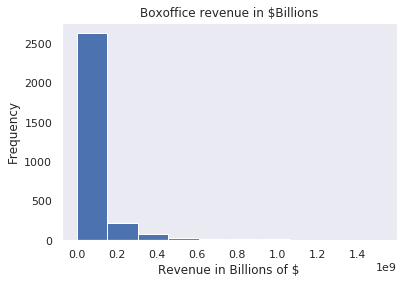

In [158]:
# necessary imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
df_train['revenue'].astype(float).plot.hist()
plt.xlabel("Revenue in Billions of $")
plt.ylabel("Frequency")
plt.title("Boxoffice revenue in $Billions")
plt.grid()

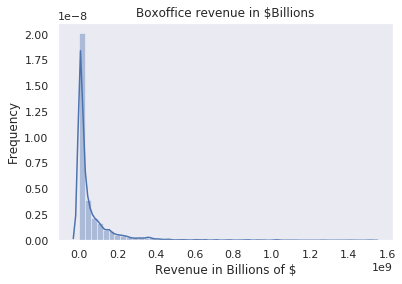

In [159]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
sns.distplot(df_train['revenue'] )
plt.xlabel("Revenue in Billions of $")
plt.ylabel("Frequency")
plt.title("Boxoffice revenue in $Billions")
plt.grid()


Text(0.5, 1.0, 'log Boxoffice revenue in $Billions')

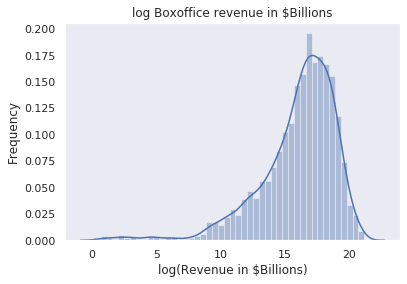

In [160]:
df_train['logRevenue'] = np.log1p(df_train['revenue'])
df_train['logRevenue'] = np.log1p(df_train['revenue'])
sns.distplot(df_train['logRevenue'] )
plt.grid()
plt.xlabel("log(Revenue in $Billions)")
plt.ylabel("Frequency")
plt.title("log Boxoffice revenue in $Billions")


Text(0.5, 1.0, 'log Boxoffice budget ')

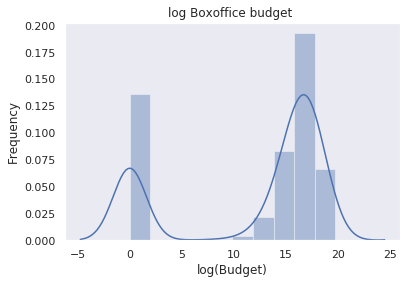

In [161]:
df_train['logbudget'] =np.log1p(df_train['budget'])
df_test['logbudget'] =np.log1p(df_test['budget'])
sns.distplot(df_train['logbudget'], bins = 10)
plt.grid()
plt.xlabel("log(Budget)")
plt.ylabel("Frequency")
plt.title("log Boxoffice budget ")


Text(0.5, 1, 'Budget vs Revenue')

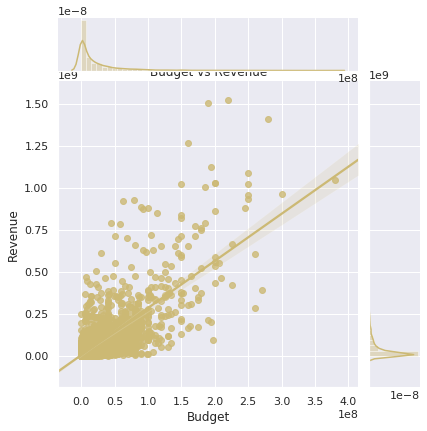

In [162]:
sns.jointplot(df_train['budget'], df_train['revenue'], kind='reg', color = 'y').set_axis_labels('Budget', 'Revenue')
plt.title('Budget vs Revenue')

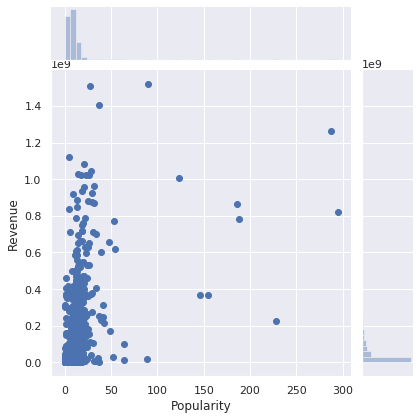

In [163]:
sns.jointplot(df_train['popularity'], df_train['revenue']).set_axis_labels('Popularity', 'Revenue')

Text(0.5, 1, 'Runtime vs Revenue')

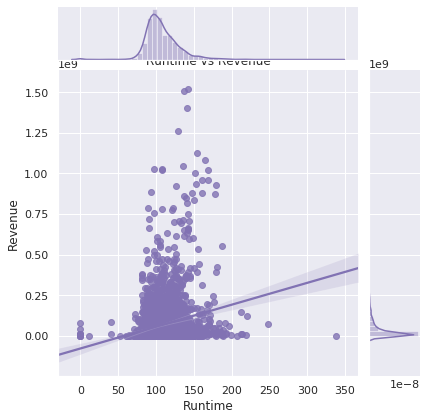

In [164]:
sns.jointplot(df_train['runtime'], df_train['revenue'], kind='reg', color = 'm').set_axis_labels('Runtime', 'Revenue')
plt.title('Runtime vs Revenue')

Text(0.5, 1, 'Revenue Correlation')

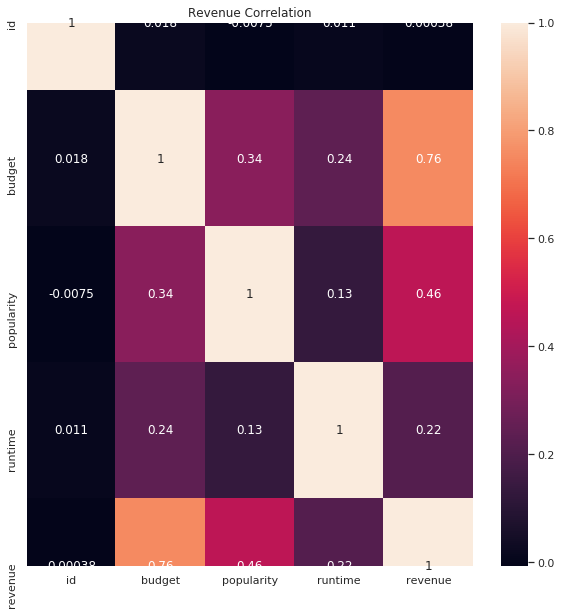

In [201]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)
plt.title('Revenue Correlation')

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1, 'Pairplot of Numerical Values')

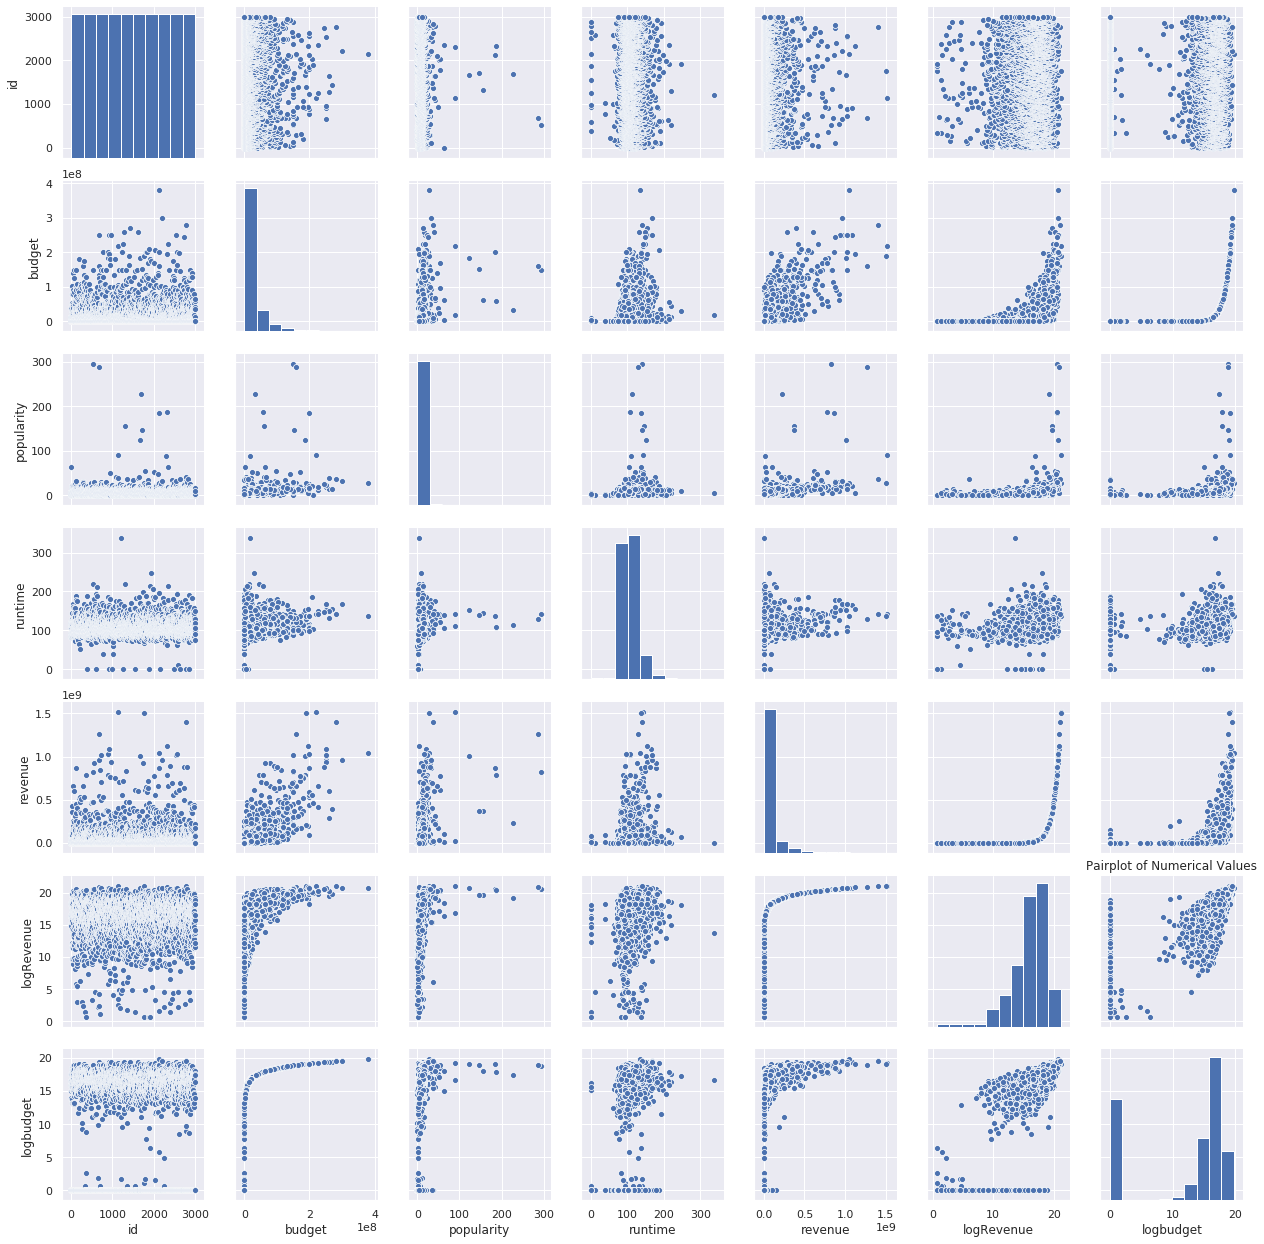

In [202]:
sns.pairplot(df_train)
plt.title('Pairplot of Numerical Values')

In [1]:
import pandas as pd 
import missingno as msno 
msno.matrix(df_train)
plt.title('Visualization of Null Values')

ModuleNotFoundError: No module named 'missingno'

# Feature Engineering

In [165]:
from sklearn.base import TransformerMixin, BaseEstimator
class LogNum(TransformerMixin):
    """
    Takes the log of variables that are passed into it. 
    """    

    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return np.log1p(X)

In [166]:
class date_transformer(TransformerMixin):
    """
    Creates month, year, and day columns from the original datetime column.
    Also fills missing values in these columns with the mean value. 

    """    

    def __init__(self, features=None):
        self.features = features
    
    def fit(self, X,y=None):
        self.col = X.columns
        return self
    
    def transform(self, X):
        df = pd.DataFrame(X, columns=[self.features])
        df = pd.DataFrame({'release_month':X[self.col[0]].dt.month,
                          'release_year':X[self.col[0]].dt.year,
                          'release_day': X[self.col[0]].dt.day})
        df.loc[:,'release_month'] = df.release_month.fillna(df.release_month.mean())
        df.loc[:,'release_year'] = df.release_year.fillna(df.release_year.mean())
        df.loc[:,'release_day'] = df.release_day.fillna(df.release_day.mean())
        return df


In [167]:
class CategoryTransformer(BaseEstimator, TransformerMixin):
    """
      Purpose:
      Binarizes the columns, 1 being yes and 0 being no.

      'homepage' and 'belongs_to_collection' use null values when a movie doesnt have the attribute.
      This enables the use of isnull() to set null values to 0 while the default value is 1.
      A hacky if statement,if you will.
      
      'status' didn't use the same method. 'Rumored' denoted it hadn't been realesed and can be set to 0.

      X= dataframe containing data to be transformed.
      features = features passed in 
      df = a transformed dataframe with new features replaceing the old ones.
    """  
    def __init__(self, features=None):
        self.features = features
       
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)
        df['homepage_y_n'] = 1
        df.loc[pd.isnull(df['homepage']) ,"homepage_y_n"] = 0
   
        df['collection_y_n'] = 1
        df.loc[pd.isnull(df['belongs_to_collection']) ,"collection_y_n"] = 0
   
        df['released_y_n'] = 1
        df.loc[df['status'] == 'Rumored' ,"released_y_n"] = 0
             
        df.drop(self.features, axis=1, inplace=True)
        return df

In [168]:
class JSONEncodeGenre(TransformerMixin):
    '''
    Purpose: 
    Parse 'genres' then derive indivdual columns for each genre. Uses df_train to get all 20 genres into a list. Once they are in the list each one is essentially OHEd. 

    X= Data

    '''

    def fit(self, X, y=None):
        return self
    def transform(self, X):
        list_of_genres = list(df_train['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
        X['all_genres'] = X['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
        top_genres = [m[0] for m in Counter([i for j in list_of_genres for i in j]).most_common()]
        for g in top_genres:
            X['genre_' + g] = X['all_genres'].apply(lambda x: 1 if g in x else 0)
        X = X.drop(['genres','all_genres'], axis=1)
        return X


    

In [169]:
list_of_genres = list(df_train['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
top_genres = [m[0] for m in Counter([i for j in list_of_genres for i in j]).most_common()]

In [170]:
class JSONEncodeProductionCountries(TransformerMixin):
    '''
    Purpose: 
    Parse 'production countries' then derive indivdual columns for each country. Uses df_train to get all countries into a list. 
    Once they are in the list each one is essentially OHEd. 

    X= Data

    '''
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        list_of_countries = list(df_train['production_countries'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
        X['all_countries'] = X['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
        top_countries = [m[0] for m in Counter([i for j in list_of_countries for i in j]).most_common(30)]
        for g in top_countries:
            X['country_' + g] = X['all_countries'].apply(lambda x: 1 if g in x else 0)
        X = X.drop(['production_countries','all_countries'], axis=1)
        return X


In [171]:
list_of_countries = list(df_train['production_countries'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
top_countries = [m[0] for m in Counter([i for j in list_of_countries for i in j]).most_common(30)]

In [172]:
class JSONEncodeProductionCompanies(TransformerMixin):
    '''
    Purpose: 
    Parse 'production countries' then derive indivdual columns for each country. Uses df_train to get all countries into a list. 
    Once they are in the list each one is essentially OHEd. 

    X= Data

    '''
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        list_of_companies = list(df_train['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
        X['all_companies'] = X['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
        top_companies = [m[0] for m in Counter([i for j in list_of_companies for i in j]).most_common(30)]
        for g in top_companies:
            X['company_' + g] = X['all_companies'].apply(lambda x: 1 if g in x else 0)
        X = X.drop(['production_companies','all_companies'], axis=1)
        return X

In [173]:
list_of_companies = list(df_train['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
top_companies = [m[0] for m in Counter([i for j in list_of_companies for i in j]).most_common(30)]

In [174]:
class JSONEncodeSpokenLanguages(TransformerMixin):
    '''
    Purpose: 
    Parse 'production countries' then derive indivdual columns for each country. Uses df_train to get all countries into a list. 
    Once they are in the list each one is essentially OHEd. 

    X= Data

    '''
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        list_of_langs = list(df_train['spoken_languages'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
        X['all_langs'] = X['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
        top_langs = [m[0] for m in Counter([i for j in list_of_langs for i in j]).most_common(30)]
        for g in top_langs:
            X['company_' + g] = X['all_langs'].apply(lambda x: 1 if g in x else 0)
        X = X.drop(['spoken_languages','all_langs'], axis=1)
        return X

In [175]:
list_of_langs = list(df_train['spoken_languages'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
top_langs = [m[0] for m in Counter([i for j in list_of_langs for i in j]).most_common(30)]

In [176]:
class JSONEncodeKeyword(TransformerMixin):
    '''
    Purpose: 
    Parse 'production countries' then derive indivdual columns for each country. Uses df_train to get all countries into a list. 
    Once they are in the list each one is essentially OHEd. 

    X= Data

    '''
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        list_of_keys = list(df_train['Keywords'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
        X['all_Keywords'] = X['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
        top_keys = [m[0] for m in Counter([i for j in list_of_keys for i in j]).most_common(500)]
        for g in top_keys:
            X['Keyword_' + g] = X['all_Keywords'].apply(lambda x: 1 if g in x else 0)
        X = X.drop(['Keywords','all_Keywords'], axis=1)
        return X

In [177]:
list_of_keys = list(df_train['Keywords'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
top_keys = [m[0] for m in Counter([i for j in list_of_keys for i in j]).most_common(500)]

In [178]:
class JSONEncodeCast(TransformerMixin):
    '''
    Purpose: 
    Parse 'production countries' then derive indivdual columns for each country. Uses df_train to get all countries into a list. 
    Once they are in the list each one is essentially OHEd. 

    X= Data

    '''
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        list_of_cast = list(df_train['cast'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
        X['all_cast'] = X['cast'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
        top_cast = [m[0] for m in Counter([i for j in list_of_cast for i in j]).most_common(1000)]
        for g in top_cast:
            X['company_' + g] = X['all_cast'].apply(lambda x: 1 if g in x else 0)
        X = X.drop(['cast','all_cast'], axis=1)
        return X

In [179]:
list_of_cast = list(df_train['cast'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
top_cast = [m[0] for m in Counter([i for j in list_of_cast for i in j]).most_common(1000)]

In [180]:
class JSONEncodeCrew(TransformerMixin):
    '''
    Purpose: 
    Parse 'production countries' then derive indivdual columns for each country. Uses df_train to get all countries into a list. 
    Once they are in the list each one is essentially OHEd. 

    X= Data

    '''
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        list_of_crew = list(df_train['crew'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
        X['all_crew'] = X['crew'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
        top_crew = [m[0] for m in Counter([i for j in list_of_crew for i in j]).most_common(300)]
        for g in top_crew:
            X['company_' + g] = X['all_crew'].apply(lambda x: 1 if g in x else 0)
        X = X.drop(['crew','all_crew'], axis=1)
        return X

In [181]:
list_of_crew = list(df_train['crew'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
top_crew = [m[0] for m in Counter([i for j in list_of_crew for i in j]).most_common(300)]

In [182]:
class Tester(TransformerMixin):
    '''
    Purpose: 
    Parse 'production countries' then derive indivdual columns for each country. Uses df_train to get all countries into a list. 
    Once they are in the list each one is essentially OHEd. 

    X= Data

    '''
    def __init__(self, features=None):
        self.features = features
    def fit(self, X, y=None):
        self.col = X.columns
        return self
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)
        list_of_companies = list(X[self.col[0]].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
        X['all_companies'] = X[self.col[0]].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
        top_companies = [m[0] for m in Counter([i for j in list_of_companies for i in j]).most_common()]
        for g in top_companies:
            X['company_' + g] = X['all_companies'].apply(lambda x: 1 if g in x else 0)
        X = X.drop(['all_companies'], axis=1)
        df.drop(self.features, axis=1, inplace=True)
        X = X.drop(self.features, axis=1)
        return X

In [183]:
class JsonParser(TransformerMixin):
    """
    Parses Json into a dictionary. Specific to this dataset
    
    Parameters
    -------
        X : DataFrame
            assumes X is a DataFrame
            
    Returns
    -------
        DataFrame
    """
    
    def fit(self, X, y=None):
        # stateless transformer
        return self
    
    def transform(self, X):
        return X.applymap(lambda x: ','.join(sorted([i['name'] for i in x])) if x != {} else '')

# Pipelines

In [194]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MultiLabelBinarizer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import HashingVectorizer
import xgboost as xgb
y = df_train['logRevenue']
y_true = df_train['revenue']
X = df_train.drop(['revenue','logRevenue'], axis = 1) #drop some features with questionable value
# drop some categorical features for now
# we will do some feature engineering around this feature later

log_num_feats = ["budget", "popularity"]
date_feats = ['release_date']
cat_feats = ['belongs_to_collection', 'homepage', 'status'] 
encode_feats = ['genres']
encode2_feats = ['production_countries']
num_feats = ['runtime']
encode3_feats = ['production_companies']
encode4_feats = ['spoken_languages']
encode5_feats=['cast']
encode6_feats = ['Keywords']
encode7_feats= ['crew'] 
genre_feats = top_genres 
prod_country_feats = top_countries
production_comp_feats = top_companies
spoken_lang_feats = top_langs
cast_feats = top_cast
keyword_feats = top_keys
crew_feats= top_crew
# Split the provided training data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")


X train           shape: (2167, 23)
X validation      shape: (383, 23)
X test            shape: (450, 23)


In [195]:
#set up the different pipelines for features 
log_pipe = Pipeline([
    ('log', LogNum())
])

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), 
    ('std_scaler', StandardScaler())
])

date_pipe = Pipeline([
    ('date', date_transformer(date_feats))
])

cat_pipe = Pipeline([ 
    ('cat_cols', CategoryTransformer(cat_feats))
])

encode_genre_pipe = Pipeline([ 
    ('genre', JSONEncodeGenre())
])

encode_prod_cont_pipe = Pipeline([ 
    ('prod_countries', JSONEncodeProductionCountries())
])

encode_prod_comp_pipe = Pipeline([ 
    ('prod_companies', JSONEncodeProductionCompanies())
])

encode_spoke_lang_pipe = Pipeline([ 
    ('prod_companies', JSONEncodeSpokenLanguages())
])

encode_cast_pipe = Pipeline([ 
    ('cast', JSONEncodeCast())
])

encode_keyword_pipe = Pipeline([ 
    ('keyword', JSONEncodeKeyword())
])

encode_crew_pipe = Pipeline([ 
    ('crew', JSONEncodeCrew())
])


In [196]:
#compile all of the pipelines into one 
data_pipeline= ColumnTransformer(transformers= 
                                        [("cat_pipeline", cat_pipe, cat_feats),
                                        ("log_pipe", log_pipe, log_num_feats),
                                        ('num_pipe', num_pipe, num_feats),
                                        ('date_pipe', date_pipe, date_feats),
                                        ('encode_genre_pipe', encode_genre_pipe, encode_feats),
                                        ('encode_prod_cont_pipe', encode_prod_cont_pipe, encode2_feats),
                                        ('encode_prod_comp_pipe', encode_prod_comp_pipe, encode3_feats),
                                        ('encode_spoke_lang_pipe', encode_spoke_lang_pipe, encode4_feats),
                                        ('encode_cast_pipe', encode_cast_pipe, encode5_feats),
                                        ('encode_keyword_pipe', encode_keyword_pipe, encode6_feats),
                                        ('encode_crew_pipe', encode_crew_pipe, encode7_feats)
                                        ],
                                  remainder='drop',
                                  
                                 )

In [197]:
xgb_pipe = make_pipeline(
    data_pipeline,
    xgb.XGBRegressor(eta = 0.01, objective = 'reg:linear',
              max_depth  =6,
              min_child_weight = 3,
              subsample = 0.8,
              colsample_bytree = 0.8,
              #eval_metric = 'rmse',
              #seed = 42,
              silent = True))

In [198]:
X_train_transformed = data_pipeline.fit_transform(X_train)
number_of_inputs = X_train_transformed.shape[1]
column_names = ["homepage","collection","released"]  + \
                log_num_feats +\
                num_feats + \
                ['release_month','release_year','release_day'] + \
                genre_feats + prod_country_feats + production_comp_feats + spoken_lang_feats + cast_feats + keyword_feats+ crew_feats
X_new = pd.DataFrame(X_train_transformed, columns = column_names)

X_new.head()

homepage  collection  released     budget  popularity   runtime  \
0       0.0         1.0       1.0  17.399030    2.189038 -0.584418   
1       1.0         1.0       1.0  18.826146    2.516030 -0.309231   
2       0.0         1.0       1.0  16.648724    2.176188  0.149414   
3       0.0         1.0       1.0  16.454568    2.583509 -0.492689   
4       1.0         1.0       1.0  16.648724    2.522109 -0.492689   

   release_month  release_year  release_day  Drama  Comedy  Thriller  Action  \
0            5.0        1997.0          2.0    1.0     0.0       1.0     1.0   
1           12.0        2007.0         14.0    1.0     0.0       1.0     1.0   
2            4.0        2012.0         20.0    0.0     1.0       0.0     0.0   
3            9.0        2000.0         19.0    0.0     0.0       0.0     0.0   
4            4.0        2004.0         30.0    0.0     1.0       0.0     0.0   

   Romance  Crime  Adventure  Horror  Science Fiction  Family  Fantasy  \
0      0.0    0.0        0.0     0.0              0.0     0.0      0.0   
1      0.0    0.0        0.0     1.0              1.0     0.0      0.0   
2      1.0    0.0        0.0     0.0              0.0     0.0      0.0   
3      0.0    0.0        0.0     1.0              0.0     0.0      0.0   
4      0.0    0.0        0.0     0.0              0.0     0.0      0.0   

   Mystery  Animation  History  Music  War  Documentary  Western  Foreign  \
0      0.0        0.0      0.0    0.0  0.0          0.0      0.0      0.0   
1      0.0        0.0      0.0    0.0  0.0          0.0      0.0      0.0   
2      0.0        0.0      0.0    0.0  0.0          0.0      0.0      0.0   
3      0.0        0.0      0.0    0.0  0.0          0.0      0.0      0.0   
4      0.0        0.0      0.0    0.0  0.0          0.0      0.0      0.0   

   TV Movie  United States of America  United Kingdom  France  Germany  \
0       0.0                       1.0             0.0     0.0      0.0   
1       0.0                       1.0             0.0     0.0      0.0   
2       0.0                       1.0             0.0     0.0      0.0   
3       0.0                       1.0             0.0     0.0      0.0   
4       0.0                       1.0             0.0     0.0      0.0   

   Canada  India  Italy  Japan  Australia  Russia  Spain  China  Hong Kong  \
0     0.0    0.0    0.0    0.0        0.0     0.0    0.0    0.0        0.0   
1     0.0    0.0    0.0    0.0        0.0     0.0    0.0    0.0        0.0   
2     0.0    0.0    1.0    0.0        0.0     0.0    1.0    0.0        0.0   
3     1.0    0.0    0.0    0.0        0.0     0.0    0.0    0.0        0.0   
4     0.0    0.0    0.0    0.0        0.0     0.0    0.0    0.0        0.0   

   Ireland  Belgium  South Korea  Mexico  Sweden  New Zealand  Netherlands  \
0      0.0      0.0          0.0     0.0     0.0          0.0          0.0   
1      0.0      0.0          0.0     0.0     0.0          0.0          0.0   
2      0.0      0.0          0.0     0.0     0.0          0.0          0.0   
3      0.0      0.0          0.0     0.0     0.0          0.0          0.0   
4      0.0      0.0          0.0     0.0     0.0          0.0          0.0   

   Czech Republic  Denmark  Brazil  Luxembourg  South Africa  Hungary  \
0             0.0      0.0     0.0         0.0           0.0      0.0   
1             0.0      0.0     0.0         0.0           0.0      0.0   
2             0.0      0.0     0.0         0.0           0.0      0.0   
3             0.0      0.0     0.0         0.0           0.0      0.0   
4             0.0      0.0     0.0         0.0           0.0      0.0   

   United Arab Emirates  Austria  Switzerland  Romania  Warner Bros.  \
0                   0.0      0.0          0.0      0.0           0.0   
1                   0.0      0.0          0.0      0.0           1.0   
2                   0.0      0.0          0.0      0.0           0.0   
3                   0.0      0.0          0.0      0.0           0.0   
4          

In [189]:
from time import time
from sklearn.metrics import mean_squared_log_error
fit = linreg_pipe.fit(X_train, y_train)

#train
y_pred = linreg_pipe.predict(X_train)
train_rmsle = np.sqrt(mean_squared_log_error(np.expm1(y_train),np.expm1(y_pred)))
mape_train = np.mean(np.abs((y_train.ravel() - y_pred.ravel()) / y_train.ravel())) * 100
avg_over_train=np.mean(y_true[:len(y_pred)]-y_pred)

#test
y_pred_test = linreg_pipe.predict(X_test)
test_rmsle = np.sqrt(((y_pred_test-y_test)**2).mean())
mape_test = np.mean(np.abs((y_test.ravel() - y_pred_test.ravel()) / y_test.ravel())) * 100
avg_over_test=np.mean(y_true[:len(y_pred_test)]-y_pred_test)

#validation
y_pred_val = linreg_pipe.predict(X_valid)
val_rmsle = np.sqrt(((y_pred_val-y_valid)**2).mean())
mape_val = np.mean(np.abs((y_valid.ravel() - y_pred_val.ravel()) / y_valid.ravel())) * 100
avg_over_val=np.mean(y_true[:len(y_pred_val)]-y_pred_val)

try: experimentLog 
except : experimentLog = pd.DataFrame(columns=["NumberOfInputs", "Train_RMSLE", "Test_RMSLE",'Valid_RMSLE','Train_MAPE','Test_MAPE',
                                               'Valid_MAPE','Avg_Over_Train','Avg_Over_Test','Avg_Over_Valid',"Description"])
experimentLog.loc[len(experimentLog)] =[f"{number_of_inputs}", 
                                        f"{round(train_rmsle,2)}", f"{round(test_rmsle,2)}",f"{round(val_rmsle,2)}",
                                        f"{round(mape_train,2)}",f"{round(mape_test,2)}",f"{round(mape_val,2)}" ,
                                        f"${round(avg_over_train):,}", f"${round(avg_over_test):,}", 
                                        f"${round(avg_over_val):,}", "Baseline 1 LinearReg Pipe with log Revenue"]

experimentLog

NumberOfInputs Train_RMSLE Test_RMSLE Valid_RMSLE Train_MAPE Test_MAPE  \
0             89        2.08       2.04        2.32      15.54     14.33   
1           1919        0.89      15.25       15.29       5.11     70.56   

  Valid_MAPE Avg_Over_Train  Avg_Over_Test Avg_Over_Valid  \
0      19.58  $66,626,808.0  $64,855,822.0  $66,309,890.0   
1      76.41  $66,626,808.0  $64,855,822.0  $66,309,890.0   

                                  Description  
0  Baseline 1 LinearReg Pipe with log Revenue  
1  Baseline 1 LinearReg Pipe with log Revenue

# Kaggle Submission

In [200]:
X_std = data_pipeline.fit_transform(X)
X_new = pd.DataFrame(X_std, columns = column_names)
test_t = data_pipeline.fit_transform(df_test)
test_std = pd.DataFrame(test_t, columns=column_names)
test_std.head()
final_model = xgb.XGBRegressor(eta = 0.01, objective = 'reg:linear',
              max_depth  =6,
              min_child_weight = 3,
              subsample = 0.8,
              colsample_bytree = 0.8,
              #eval_metric = 'rmse',
              #seed = 42,
              silent = True)
final_model.fit(X_new.values, y)
predictions = np.expm1(final_model.predict(test_std.values)) #test_std
pd.DataFrame({'revenue': predictions.reshape(-1,)}, index=df_test.id).to_csv('best_model_xgb.csv')

/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


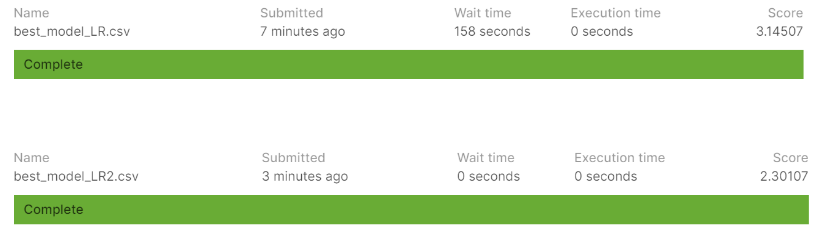

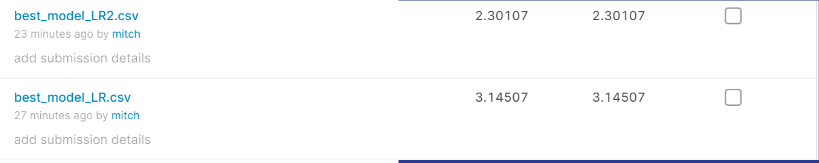

# Discussion of Results

Our final results showed a RMSLE of 2.2 on the Training data and a 2.11 RMSLE of on the Test data.
Additionally, we have a Train mean average percentage error of 16.4% and a Test MAPE of 14.73%. This indicates that only a small portion of the predicitions are incorrect.
The average number of dollars in which we overpredict for the movie was 8,000,000,000 in the Training data and 7,000,000,000 in the Test data.
Although this may seem high, movie revenues today typically run up to tens of millions of dollars. 
Since the difference between our Train and Test results are relatively small, it is evident that our model is validated. It does a good job at predicting possible box revenues with a relatively small error.


# Conclusion

The project is to utilize a movie dataset to accurately predict box office revenues. 
This project is important because it allows the movie industry to accurately predict whether
a movie will be successful or not and also its potential earnings. To accomplish this task, the team created machine 
learning pipelines with features such as log_num_feats = ["budget", "popularity"], 
date_feats = ['release_date'], cat_feats = ['belongs_to_collection', 'homepage', 'status'], and
encode_feats = ['genres']. The notebook goes through exploratory and visual data analysis and feature engineering to produce the best possible results. The results on the model achieved error rates of 2.2 and 2.11 RMSLE for the train and test data. The movies were overpredicted by 8,000,000 and 7,000,000. This proves that the model is succesful at predicting movie revenues. The next step in out project is to incorporate new features such as 
['production_countries'], hash_feats = ['production_companies', 'spoken_languages'], and
hash2_feats = ['Keywords', 'cast', 'crew'] in an attempt to further imporve and tune the model. 